# Conhecendo os Dados

## Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

In [1]:
import pandas as pd

df = pd.read_csv('dados.csv')

df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Tipos de dados

### Variáveis qualitativas ordinais
#### Variáveis que podem ser ordenadas ou hierarquizadas

In [2]:
sorted(df['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variáveis qualitativas nominais
#### Variáveis que não podem ser ordenadas ou hierarquizadas

In [3]:
sorted(df['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [4]:
sorted(df['Cor'].unique())

[0, 2, 4, 6, 8]

### Variáveis quantitativas discretas
#### Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável

In [5]:
df['Idade'].min()

13

### Variáveis quantitativas contínuas

#### Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).

In [6]:
df['Altura'].max()

2.028496765

## Distribuição de frequências

### Distribuição de frequências para variáveis qualitativas

In [7]:
# 0 = Homens
# 1 = Mulheres

frequencia = df['Sexo'].value_counts()

frequencia

0    53250
1    23590
Name: Sexo, dtype: int64

In [8]:
#Porcentagem

percentual = df['Sexo'].value_counts(normalize = True) * 100

percentual

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [9]:
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

dist_freq

,Frequência,Porcentagem (%)
0,53250,69.299844
1,23590,30.700156


In [10]:
dist_freq.rename({0: 'Masculino', 1:'Feminino'}, inplace=True)
dist_freq.rename_axis('Sexo', axis='columns', inplace=True)

dist_freq

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


In [11]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

percentual = pd.crosstab(df.Sexo,
                         df.Cor,
                         aggfunc = 'mean',
                         values = df.Renda)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


### Distribuição de frequências para variáveis quantitativas

In [12]:
df['Renda'].min()

0

In [13]:
df['Renda'].max()

200000

In [14]:
#Tabela de Frequências

classes = [0, 1576, 3152, 7880, 15760, 200000]

labels = ['E', 'D', 'C', 'B', 'A']

frequencia = pd.value_counts(
    pd.cut(x = df.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)

percentual = pd.value_counts(
    pd.cut(x = df.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True),
    normalize = True
)

dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


#### Regra de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [15]:
#Classes de amplitude fixa
#A regra de Sturges é um método para definição do número de classes, baseado no total de observações de uma variável

import numpy as np

n = df.shape[0]
k = 1 + (10 / 3) * np.log10(n)

k

17.285291187298853

In [16]:
k = int(k.round(0))

k

17

In [17]:
frequencia = pd.value_counts(
pd.cut(
    x = df['Renda'],
    bins = k,
    include_lowest = True
),
    sort = False
)

percentual = pd.value_counts(
pd.cut(
    x = df['Renda'],
    bins = k,
    include_lowest = True
),
    sort = False,
    normalize = True
)

dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_quantitativas_amplitude_fixa.sort_index(ascending = True)

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


#### Histograma

C:\Users\PC-JOABE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Metros')

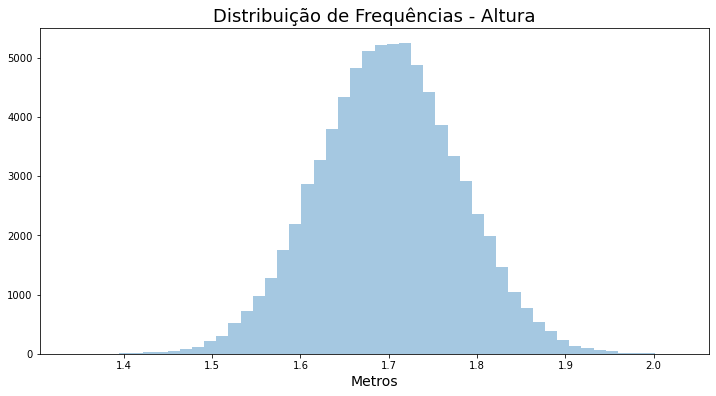

In [18]:
import seaborn as sns

ax = sns.distplot(df.Altura, kde = False)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)

Text(0.5, 0, 'Metros')

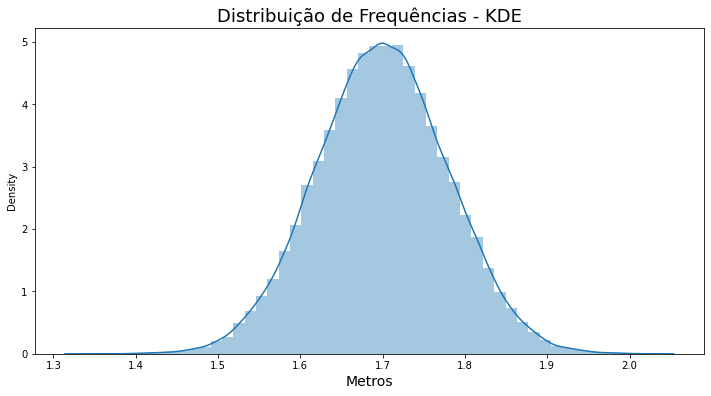

In [19]:
import seaborn as sns

ax = sns.distplot(df.Altura)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)

<AxesSubplot:>

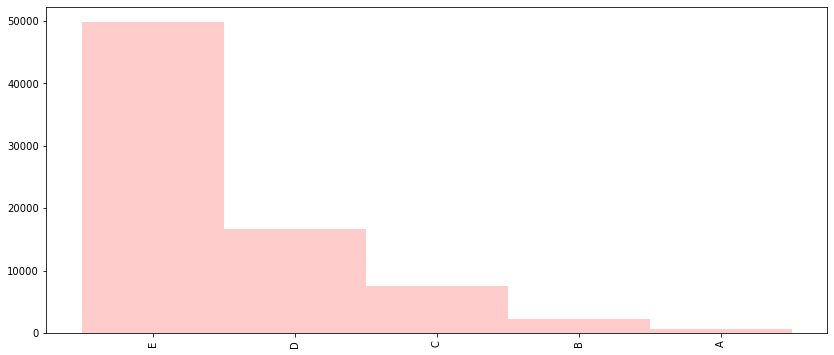

In [20]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width=1, color = 'red', alpha = 0.2, figsize = (14, 6))

## Medidas de tendência central

### Média aritmética

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

In [21]:
# A média é muito afetada pelos extremos

notas = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
notas.rename_axis('Matérias', axis = 'columns', inplace = True)
notas

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [22]:
notas['Fulano'].mean()

7.714285714285714

In [23]:
df['Renda'].mean()

2000.3831988547631

In [24]:
df.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

### Mediana

In [25]:
# Valor que divide a série ao meio

fulano = notas.Fulano
fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [26]:
fulano = notas.Fulano.sort_values()
fulano

Inglês         4
História       6
Matemática     8
Geografia      8
Química        8
Português     10
Física        10
Name: Fulano, dtype: int64

In [27]:
fulano = notas.Fulano.reset_index()
fulano

,index,Fulano
0,Matemática,8
1,Português,10
2,Inglês,4
3,Geografia,8
4,História,6
5,Física,10
6,Química,8


In [28]:
n = fulano.shape[0]
n

7

In [29]:
elemento_mediano = (n + 1) / 2
elemento_mediano

4.0

In [30]:
fulano.loc[elemento_mediano - 1]

index     Geografia
Fulano            8
Name: 3, dtype: object

In [31]:
fulano.median()

Fulano    8.0
dtype: float64

In [32]:
df['Renda'].median()

1200.0

In [33]:
df['Renda'].quantile()

1200.0

### Moda

In [34]:
# Valor mais frequente em um conjunto
# Pode ser multimodal

notas.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [35]:
df['Renda'].mode()

0    788
dtype: int64

In [36]:
df['Altura'].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

### Relação entre média, mediana e moda

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

## Medidas separatrizes

#### Quartis, decis e percentis

In [37]:
# Igual a mediana

df.Renda.quantile()

1200.0

In [42]:
# Primeiro, Segundo e terceiro quartil
# Divisão n - 1

df.Renda.quantile([0.25,0.5,0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [44]:
[i/10 for i in range(1, 10)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [45]:
# Decis - Dividem em 10 partes
 
df.Renda.quantile([i/10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [47]:
# Percentis - Dividem em 100 partes
 
df.Renda.quantile([i/100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

In [50]:
df.Idade.quantile([i / 10 for i in range(1, 10)])

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

C:\Users\PC-JOABE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências Acumulada'}, xlabel='Anos', ylabel='Acumulado'>

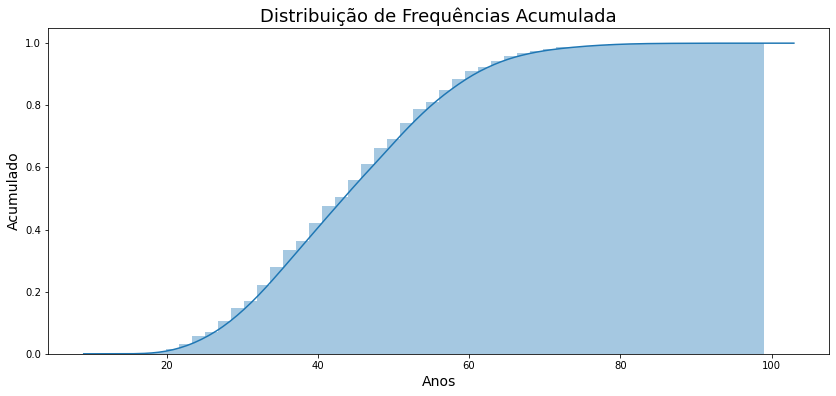

In [48]:
ax = sns.distplot(df.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

In [51]:
import matplotlib.pyplot as plt

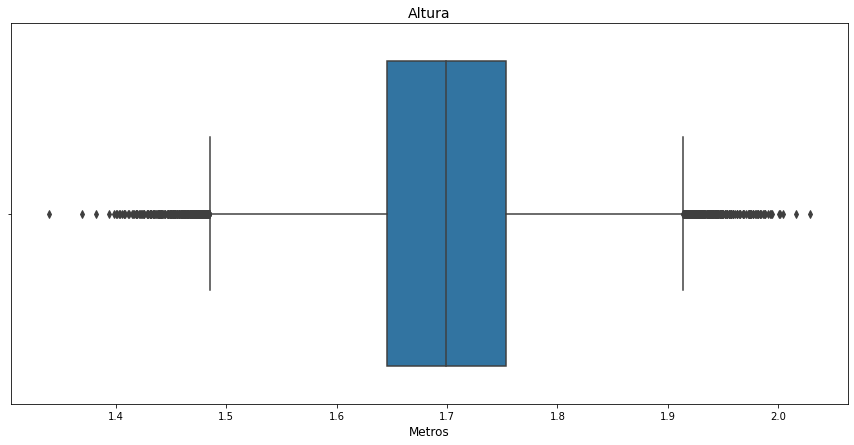

In [61]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(x = 'Altura', data = df, orient = 'h')
ax.set_title('Altura', fontsize=14)
ax.set_xlabel('Metros', fontsize=12)
plt.show()

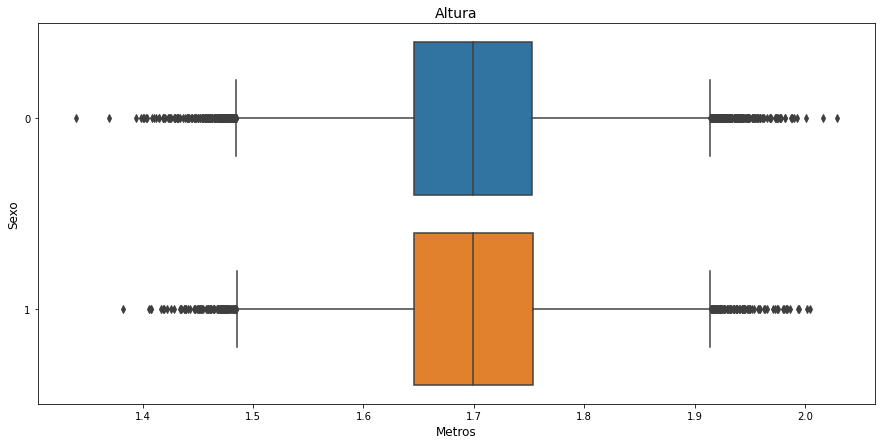

In [63]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(x = 'Altura', y = 'Sexo', data = df, orient = 'h')
ax.set_title('Altura', fontsize=14)
ax.set_xlabel('Metros', fontsize=12)
ax.set_ylabel('Sexo', fontsize=12)
plt.show()

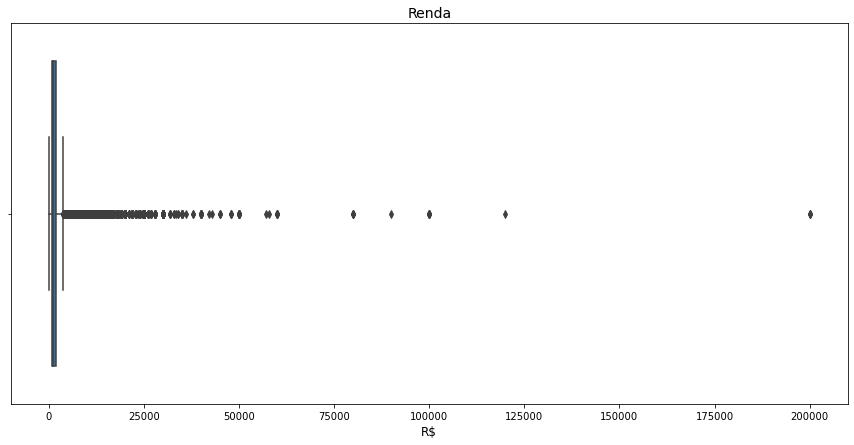

In [68]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(x = 'Renda', data = df, orient = 'h')
ax.set_title('Renda', fontsize=14)
ax.set_xlabel('R$', fontsize=12)
plt.show()

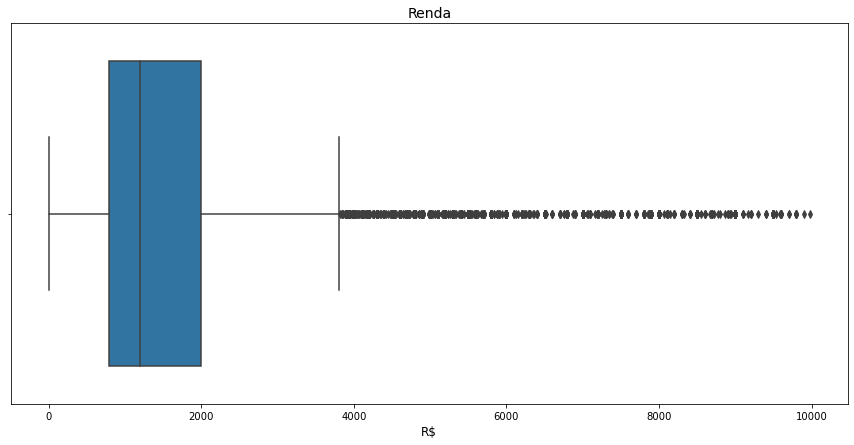

In [71]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(x = 'Renda', data = df.query('Renda < 10000'), orient = 'h')
ax.set_title('Renda', fontsize=14)
ax.set_xlabel('R$', fontsize=12)
plt.show()

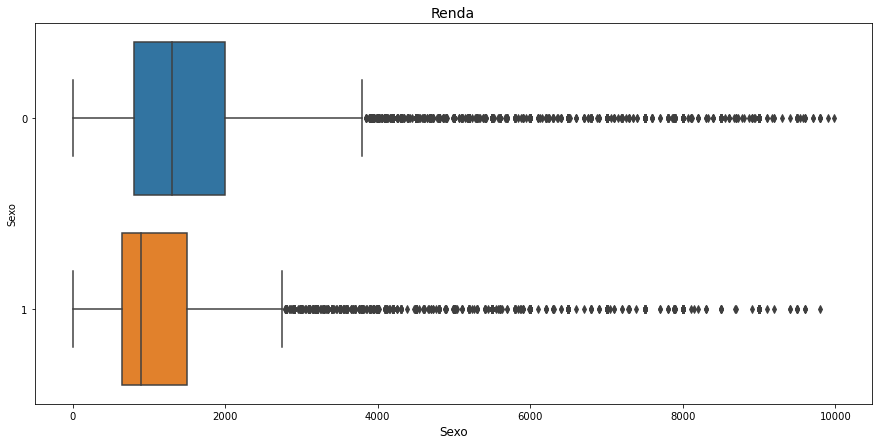

In [74]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = df.query('Renda < 10000'), orient = 'h')
ax.set_title('Renda', fontsize=14)
ax.set_xlabel('R$', fontsize=12)
ax.set_xlabel('Sexo', fontsize=12)
plt.show()

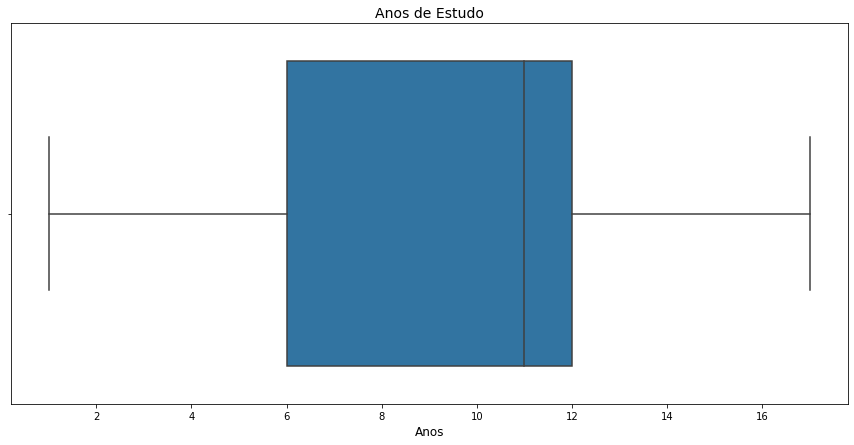

In [75]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(x = 'Anos de Estudo', data = df, orient = 'h')
ax.set_title('Anos de Estudo', fontsize=14)
ax.set_xlabel('Anos', fontsize=12)
plt.show()

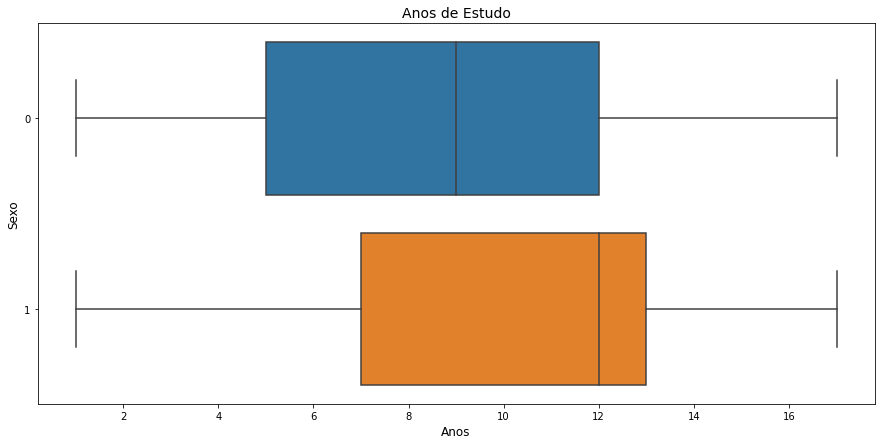

In [77]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(x = 'Anos de Estudo', y = 'Sexo', data = df, orient = 'h')
ax.set_title('Anos de Estudo', fontsize=14)
ax.set_xlabel('Anos', fontsize=12)
ax.set_ylabel('Sexo', fontsize=12)
plt.show()

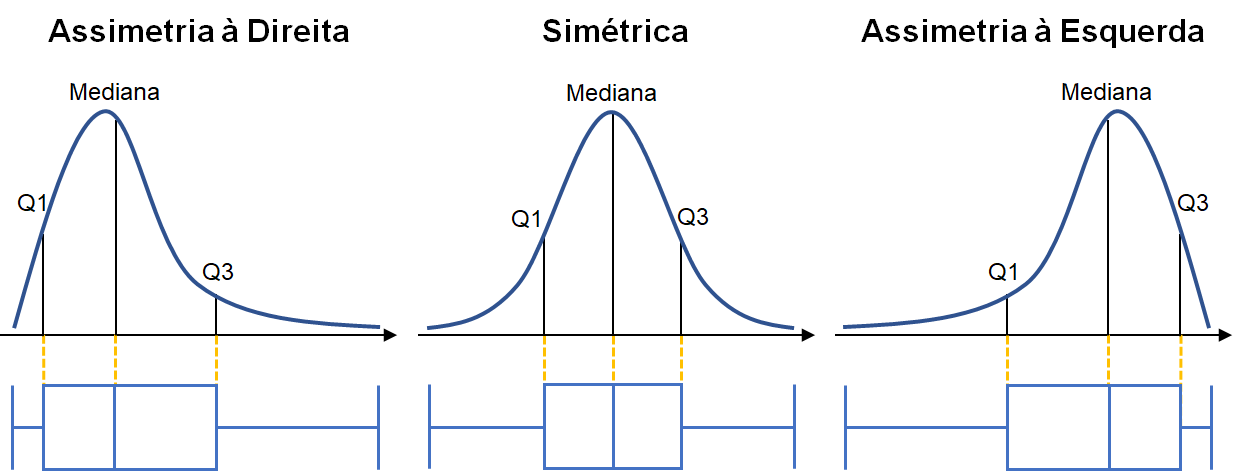

In [78]:
from IPython import display
display.Image("img006.png")

## Medidas de dispersão

In [79]:
notas

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [80]:
notas.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [81]:
notas.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

#### Desvio médio absoluto

O desvio médio absoluto representa o valor real do desvio de uma variável em relação a sua média.

In [82]:
notas_fulano = notas[['Fulano']]

notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [84]:
media_nota_fulano = notas_fulano.mean()[0]
media_nota_fulano

7.714285714285714

In [85]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - media_nota_fulano
notas_fulano

<ipython-input-85-ebbee3091576>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_fulano['Desvio'] = notas_fulano['Fulano'] - media_nota_fulano


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [88]:
# Transformando em valores absolutos

notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()

notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [89]:
# Desvio médio absoluto

notas_fulano['|Desvio|'].mean()

1.5510204081632648

In [91]:
desvio_medio_abs = notas_fulano['Fulano'].mad()
desvio_medio_abs

1.5510204081632648

#### Variância

In [93]:
notas_fulano['(Desvio) ^ 2'] = notas_fulano['Desvio'].pow(2)

notas_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio) ^ 2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [98]:
notas_fulano['(Desvio) ^ 2'].sum() / (len(notas_fulano) - 1)

4.57142857142857

In [97]:
# Resultado ao quadrado, por exemplo, m -> m²

variancia  = notas_fulano['Fulano'].var()
variancia

4.57142857142857

#### Desvio padrão

Este cálculo é justamente a raiz quadrada da variância, cujo resultado é a média dos desvios ao quadrado.

In [100]:
np.sqrt(variancia)

2.1380899352993947

In [101]:
desvio_padrao = notas_fulano['Fulano'].std()

desvio_padrao

2.1380899352993947

In [102]:
notas

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [103]:
notas.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [105]:
notas.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [104]:
notas.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [106]:
notas.std()

Matérias
Fulano      2.138090
Beltrano    4.460141
Sicrano     0.566947
dtype: float64

In [111]:
dataset['Idade']

0    53
1    72
2    54
3    27
4    30
5    40
6    58
7    32
8    44
9    51
Name: Idade, dtype: int64

In [126]:
dataset.query('Sexo == "M"' )['Idade'].std()

16.64531966249572